In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as pe
import plotly.offline as po
import os
import glob

from functools import reduce

#Metrics and performance libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, r2_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, plot_confusion_matrix

#Modelling libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_regression
from sklearn.impute import SimpleImputer
from ctypes import LibraryLoader
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

#Supervised and Unsupervised Learning libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import lightgbm as lgb
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import randint as sp_randint, pearsonr

#Misc
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
 

In [2]:
master_df = pd.read_csv('C:/Users/mds22mok/Downloads/Master.csv')

In [3]:
master_df.describe(include='all')

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,...,862.000000,862.00000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,822.064965,1.545244,77.682135,0.133411,0.073086,0.343387,-0.034803,0.412993,0.084687,0.171694,...,31.562529,34.25574,85.967305,192.643175,0.532390,0.215197,27.331787,10.488399,8.745940,1.425754
std,514.455402,0.498238,7.090661,0.806231,0.626918,0.802404,0.579314,0.783819,0.736329,0.793842,...,9.487784,14.03661,28.229245,67.122477,1.232408,0.413662,3.718165,5.061914,5.520668,0.792494
min,2.000000,1.000000,58.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-4.000000,-4.00000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,-4.000000
25%,361.250000,1.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.600000,28.98400,82.874000,170.126000,0.701000,0.000000,27.000000,7.000000,5.000000,1.000000
50%,787.000000,2.000000,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,34.000000,34.84100,88.278000,201.058000,0.803000,0.000000,28.000000,11.000000,9.000000,1.000000
75%,1330.750000,2.000000,82.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,34.500000,41.44800,97.286000,231.990000,0.962000,0.500000,29.000000,14.000000,13.000000,2.000000
max,1639.000000,2.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,36.000000,115.33400,234.208000,367.317000,1.923000,3.000000,30.000000,23.000000,23.000000,7.000000


In [4]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RID        862 non-null    int64  
 1   PTGENDER   862 non-null    int64  
 2   Age        862 non-null    int64  
 3   MHPSYCH    862 non-null    int64  
 4   MH2NEURL   862 non-null    int64  
 5   MH4CARD    862 non-null    int64  
 6   MH6HEPAT   862 non-null    int64  
 7   MH8MUSCL   862 non-null    int64  
 8   MH9ENDO    862 non-null    int64  
 9   MH10GAST   862 non-null    int64  
 10  MH12RENA   862 non-null    int64  
 11  MH16SMOK   862 non-null    int64  
 12  MH17MALI   862 non-null    int64  
 13  APGEN1     862 non-null    int64  
 14  APGEN2     862 non-null    int64  
 15  AXT117     862 non-null    float64
 16  BAT126     862 non-null    float64
 17  HMT3       862 non-null    float64
 18  HMT7       862 non-null    float64
 19  HMT13      862 non-null    int64  
 20  HMT40     

In [5]:
master_df.duplicated().any()

False

In [6]:
df = master_df

In [7]:
df.shape

(862, 32)

In [8]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(32)

,Total,Percent
RID,0,0.0
PTGENDER,0,0.0
LDELTOTAL,0,0.0
LIMMTOTAL,0,0.0
MMSCORE,0,0.0
CDGLOBAL,0,0.0
RCT392,0,0.0
RCT20,0,0.0
RCT11,0,0.0
RCT6,0,0.0


In [9]:
#Checking for correlation
df.corr()

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
RID,1.000000,-0.006645,-0.267987,0.101094,0.052533,0.012236,0.016258,0.015856,0.073785,0.009284,...,-0.127334,-0.100750,-0.109519,-0.092093,-0.133226,0.118692,-0.138948,-0.211056,-0.220251,0.181141
PTGENDER,-0.006645,1.000000,-0.049183,0.055794,-0.005021,-0.038906,0.049724,0.145410,0.063941,0.074304,...,0.010003,-0.101340,-0.068686,0.199379,-0.068588,-0.009257,-0.016263,0.063760,0.070688,0.002634
Age,-0.267987,-0.049183,1.000000,-0.031581,0.037108,0.129031,-0.001848,0.066905,-0.027539,0.053244,...,0.007927,0.077132,0.024117,-0.056943,0.009573,0.127885,-0.134103,-0.180181,-0.185634,0.111334
MHPSYCH,0.101094,0.055794,-0.031581,1.000000,0.555155,0.451544,0.596813,0.508189,0.522878,0.501318,...,0.100957,0.086940,0.061042,0.062623,0.101223,-0.033946,0.019312,-0.002609,0.000578,-0.007202
MH2NEURL,0.052533,-0.005021,0.037108,0.555155,1.000000,0.571128,0.726551,0.595578,0.585389,0.562859,...,0.119084,0.071797,0.080783,0.057680,0.111082,0.010939,-0.036823,-0.051886,-0.042952,0.023792
MH4CARD,0.012236,-0.038906,0.129031,0.451544,0.571128,1.000000,0.610402,0.529538,0.516864,0.485336,...,0.102473,0.140130,0.119335,-0.031760,0.109139,-0.100419,0.099967,0.050737,0.054588,-0.096844
MH6HEPAT,0.016258,0.049724,-0.001848,0.596813,0.726551,0.610402,1.000000,0.691603,0.684886,0.639334,...,0.127435,0.082623,0.088448,0.088386,0.112236,-0.140765,0.125610,0.086997,0.088384,-0.127065
MH8MUSCL,0.015856,0.145410,0.066905,0.508189,0.595578,0.529538,0.691603,1.000000,0.563166,0.582144,...,0.125276,0.111097,0.069109,0.081231,0.106131,-0.134723,0.117119,0.062097,0.076078,-0.128206
MH9ENDO,0.073785,0.063941,-0.027539,0.522878,0.585389,0.516864,0.684886,0.563166,1.000000,0.549330,...,0.067802,0.077336,0.121120,0.000828,0.066370,-0.119005,0.109356,0.083619,0.079013,-0.111619
MH10GAST,0.009284,0.074304,0.053244,0.501318,0.562859,0.485336,0.639334,0.582144,0.549330,1.000000,...,0.076061,0.055644,0.037978,0.047468,0.071373,-0.093193,0.066065,0.055413,0.049982,-0.062790


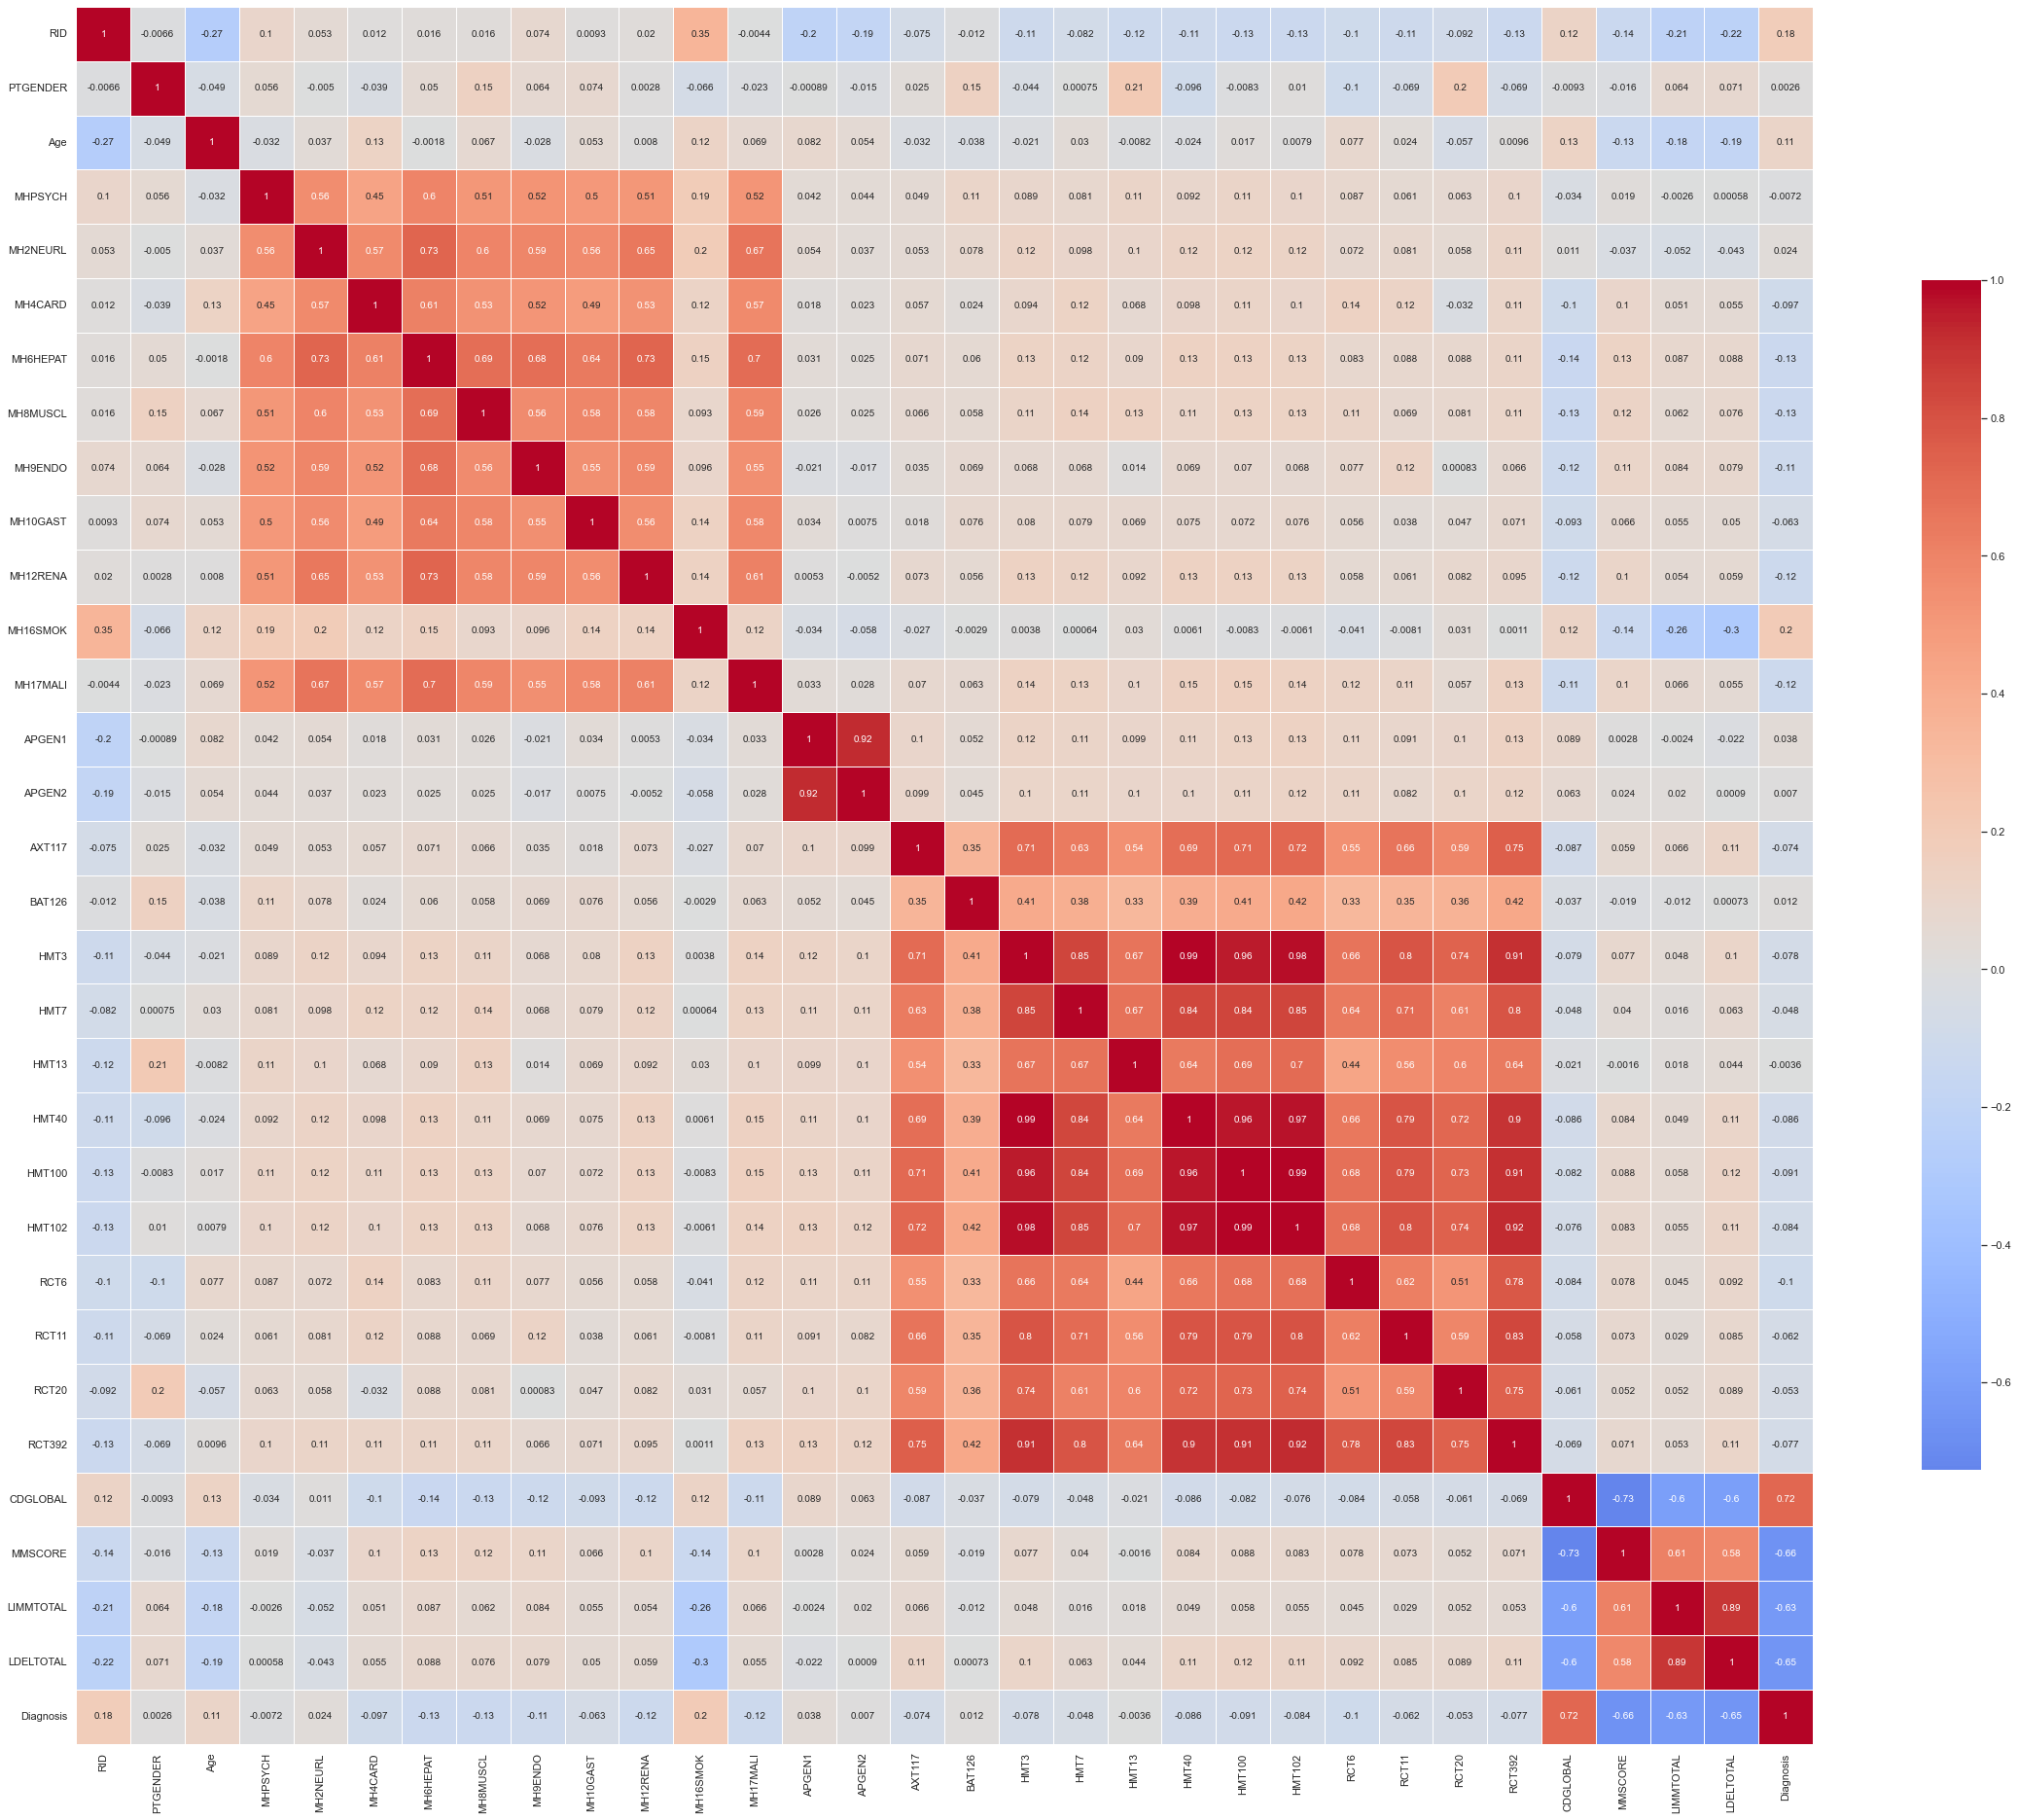

In [10]:
plt.figure(figsize=(40,45))
sns.heatmap(df.corr(),cmap='coolwarm', center=0, square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
plt.show()

In [11]:
#Making a copy so that i can readily reference the original dataframe where applicable
df1 = df.copy()
df1

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,2,1,74,0,1,0,0,0,0,0,...,34.3,37.844,90.080,173.993,0.916,0.0,30,16,14,1
1,3,2,76,1,0,0,0,0,0,1,...,34.2,18.021,129.715,251.322,0.792,0.0,30,9,11,1
2,4,2,93,0,0,1,0,1,0,0,...,34.2,52.261,86.477,216.524,1.018,0.0,27,9,2,1
3,5,1,82,0,0,1,0,0,1,0,...,34.0,33.038,108.096,162.393,1.131,0.5,30,10,0,2
4,10,1,90,0,0,0,0,0,0,0,...,35.1,33.639,126.112,158.526,1.131,1.0,21,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1632,1,74,0,0,0,0,0,1,1,...,34.3,26.431,91.882,158.526,0.713,0.5,27,6,6,2
858,1634,1,78,0,0,0,0,0,1,1,...,33.6,25.830,97.286,185.592,0.781,-4.0,20,5,4,1
859,1636,1,67,0,0,1,0,0,1,0,...,34.5,25.830,214.390,162.393,0.826,0.5,28,3,3,2
860,1637,1,68,0,0,0,0,1,0,0,...,33.8,20.424,100.890,297.721,0.792,0.5,28,8,12,2


In [12]:
#Dropping the RID column due to high cardinality
df1.drop("RID", axis=1, inplace=True)

In [13]:
df1.head()

,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,MH12RENA,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,1,74,0,1,0,0,0,0,0,0,...,34.3,37.844,90.080,173.993,0.916,0.0,30,16,14,1
1,2,76,1,0,0,0,0,0,1,0,...,34.2,18.021,129.715,251.322,0.792,0.0,30,9,11,1
2,2,93,0,0,1,0,1,0,0,0,...,34.2,52.261,86.477,216.524,1.018,0.0,27,9,2,1
3,1,82,0,0,1,0,0,1,0,0,...,34.0,33.038,108.096,162.393,1.131,0.5,30,10,0,2
4,1,90,0,0,0,0,0,0,0,0,...,35.1,33.639,126.112,158.526,1.131,1.0,21,3,0,3


In [14]:
# Check for missing values
total = df1.isnull().sum().sort_values(ascending = False)
percent = (df1.isnull().sum() / df1.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(31)

,Total,Percent
PTGENDER,0,0.0
HMT3,0,0.0
LDELTOTAL,0,0.0
LIMMTOTAL,0,0.0
MMSCORE,0,0.0
CDGLOBAL,0,0.0
RCT392,0,0.0
RCT20,0,0.0
RCT11,0,0.0
RCT6,0,0.0


In [15]:
print(df1.info())
print()
print('The shape of our features is:', df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PTGENDER   862 non-null    int64  
 1   Age        862 non-null    int64  
 2   MHPSYCH    862 non-null    int64  
 3   MH2NEURL   862 non-null    int64  
 4   MH4CARD    862 non-null    int64  
 5   MH6HEPAT   862 non-null    int64  
 6   MH8MUSCL   862 non-null    int64  
 7   MH9ENDO    862 non-null    int64  
 8   MH10GAST   862 non-null    int64  
 9   MH12RENA   862 non-null    int64  
 10  MH16SMOK   862 non-null    int64  
 11  MH17MALI   862 non-null    int64  
 12  APGEN1     862 non-null    int64  
 13  APGEN2     862 non-null    int64  
 14  AXT117     862 non-null    float64
 15  BAT126     862 non-null    float64
 16  HMT3       862 non-null    float64
 17  HMT7       862 non-null    float64
 18  HMT13      862 non-null    int64  
 19  HMT40      862 non-null    float64
 20  HMT100    

<AxesSubplot:xlabel='PTGENDER', ylabel='count'>

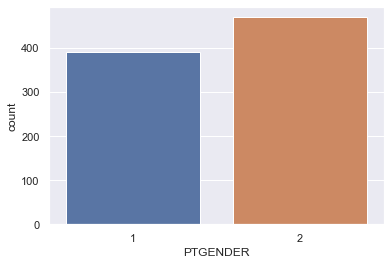

In [16]:
#Plotting the test ratio Male to Female
sns.countplot(df1['PTGENDER'])

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

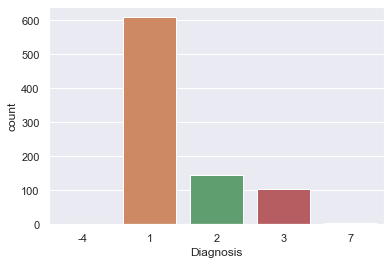

In [17]:
#More Male come for diagnosis

#1 stands for Female
#2 stands for Male
#Plotting the diagnosis report
sns.countplot(df1['Diagnosis'])

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

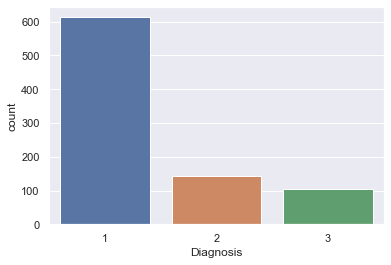

In [18]:
# From graph it is evident that '-4' and '7' are very rare event, hence they will be replaced with the most frequent '1'

#1 stands for healthy control (HC) which is most frequent diagnosis result
#2 stands for mild cognitive impairment (MCI) of which the frequency is very low compared to HC
#3 stands for Alzheimer’s disease (AD) which is least frequent diagnosis result.
# replace the least important values with the most frequent value
df1['Diagnosis'] = df1['Diagnosis'].replace([-4, 7], 1)
#An updated plot after resolving the outliers
sns.countplot(df1['Diagnosis'])

In [19]:
X = df1.drop("Diagnosis", axis=1)
y = df1["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
#Balancing the dataset by over sampling the training data
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [21]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [22]:
def describe_model(estimator, X, y):
    print(f"Cross-validation accuracy: {cross_val_score(estimator, X, y, scoring = 'accuracy').mean():.3f}")
    
    selector_forward = SequentialFeatureSelector(estimator, n_features_to_select = 5, direction = "forward")
    selector_forward.fit(X, y)
    X_FW = selector_forward.transform(X)
    print(f"Accuracy with forward selection of 5 features: {cross_val_score(estimator, X_FW, y, scoring = 'accuracy').mean():.3f}")
    
    selector_backward = SequentialFeatureSelector(estimator, n_features_to_select = 5, direction = "backward")
    selector_backward.fit(X, y)
    X_BW = selector_backward.transform(X)
    print(f"Accuracy with backward selection of 5 features: {cross_val_score(estimator, X_BW, y, scoring = 'accuracy').mean():.3f}")

In [23]:
# Using Naives Bayes as our first model
gnb = naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09)
describe_model(gnb, X_train, y_train)

Cross-validation accuracy: 0.837
Accuracy with forward selection of 5 features: 0.921
Accuracy with backward selection of 5 features: 0.915


In [24]:
# Fitting the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test) 

# Accuracy on Train
print("Training Accuracy is: ", gnb.score(X_train, y_train)) 
# Accuracy on Test
print("Testing Accuracy is: ", gnb.score(X_test, y_test))

Training Accuracy is:  0.8583525789068515
Testing Accuracy is:  0.8185328185328186


In [25]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8185


In [26]:
skor = accuracy_score(y_test, y_pred)
print('Accuracy_score is:', skor)
print()
print("Classification report")
print(classification_report(y_test, y_pred))

Accuracy_score is: 0.8185328185328186

Classification report
              precision    recall  f1-score   support

           1       0.93      0.87      0.90       180
           2       0.54      0.63      0.58        43
           3       0.69      0.81      0.74        36

    accuracy                           0.82       259
   macro avg       0.72      0.77      0.74       259
weighted avg       0.83      0.82      0.82       259



<AxesSubplot:title={'center':'NAIVE BAYES MODEL'}>

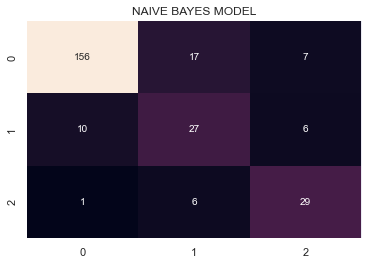

In [27]:
#Plot it in seaborn heatmap
n_cnf_matrix = confusion_matrix(y_test, y_pred)
plt.title("NAIVE BAYES MODEL")
sns.heatmap(n_cnf_matrix, annot=True, cbar=False, fmt='g')

In [28]:
#Evaluating the model performance
accuracy = accuracy_score(y_pred, y_test)
print(f"The accuracy of the {type(gnb).__name__} is {round(accuracy, 2) * 100}%\n")

The accuracy of the GaussianNB is 82.0%



In [91]:
df2 = df1
#AIBL with Decision tree
# Selecting the dependent and independent variable

x = df2.drop('Diagnosis', axis = 1)
y = df2['Diagnosis']

In [92]:
# Splitting the dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42) 

In [93]:
#Balancing the dataset by over sampling the training data
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [94]:
#Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [95]:
#Evaluating the model performance
y_pred = dtree.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"The accuracy of the {type(dtree).__name__} is {round(accuracy_score(y_pred, y_test) * 100)}%\n\n")
print("Classification report")
rf_cnf_matrix = confusion_matrix(y_pred, y_test)
print(classification_report(y_test, y_pred))

The accuracy of the DecisionTreeClassifier is 83%


Classification report
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       180
           2       0.51      0.58      0.54        43
           3       0.81      0.69      0.75        36

    accuracy                           0.83       259
   macro avg       0.75      0.73      0.74       259
weighted avg       0.84      0.83      0.83       259



<AxesSubplot:title={'center':'DECISION TREE MODEL'}>

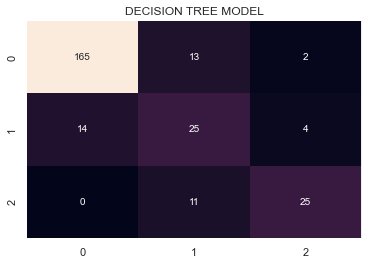

In [96]:
#Plot it in seaborn heatmap
d_cnf_matrix = confusion_matrix(y_test, y_pred)
plt.title("DECISION TREE MODEL")
sns.heatmap(d_cnf_matrix, annot=True, cbar=False, fmt='g')

In [35]:
#AIBL with Random Forest
x = df2.drop("Diagnosis", axis=1)
y = df2["Diagnosis"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [37]:
#Balancing the dataset by over sampling the training data
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [38]:
RandomF = RandomForestClassifier(random_state=42)
R_ForestModel=RandomF.fit(x, y)

Feature: PTGENDER, Score: 0.00548|					Feature: Age, Score: 0.02844|					Feature: MHPSYCH, Score: 0.00570|					Feature: MH2NEURL, Score: 0.00924|					Feature: MH4CARD, Score: 0.00625|					Feature: MH6HEPAT, Score: 0.00405|					Feature: MH8MUSCL, Score: 0.00657|					Feature: MH9ENDO, Score: 0.00773|					Feature: MH10GAST, Score: 0.00513|					Feature: MH12RENA, Score: 0.00309|					Feature: MH16SMOK, Score: 0.01420|					Feature: MH17MALI, Score: 0.00362|					Feature: APGEN1, Score: 0.01538|					Feature: APGEN2, Score: 0.01006|					Feature: AXT117, Score: 0.01997|					Feature: BAT126, Score: 0.02357|					Feature: HMT3, Score: 0.02036|					Feature: HMT7, Score: 0.02224|					Feature: HMT13, Score: 0.02373|					Feature: HMT40, Score: 0.02019|					Feature: HMT100, Score: 0.01993|					Feature: HMT102, Score: 0.01887|					Feature: RCT6, Score: 0.02166|					Feature: RCT11, Score: 0.01709|					Feature: RCT20, Score: 0.02120|					Feature: RCT392, Score: 0.02142|					Feature: CDGLOBAL, Score: 0.2615

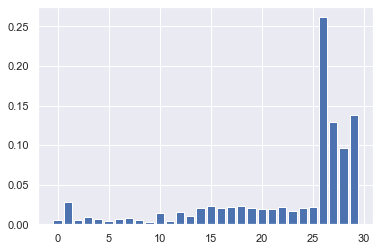

In [39]:
importance = R_ForestModel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (df2.columns[i],v), end='|\t\t\t\t\t')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [40]:
random_forest = RandomForestClassifier() 
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X=x_test) 

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(x_train, y_train)) 

# Accuracy on Train 
print("Testing Accuracy is: ", random_forest.score(x_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.8803088803088803


In [41]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy_score is:', accuracy)
print()
print("Classification report")
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy_score is: 0.8803088803088803

Classification report
              precision    recall  f1-score   support

           1       0.96      0.94      0.95       180
           2       0.64      0.74      0.69        43
           3       0.84      0.72      0.78        36

    accuracy                           0.88       259
   macro avg       0.81      0.80      0.80       259
weighted avg       0.89      0.88      0.88       259



<AxesSubplot:title={'center':'RANDOM FOREST'}>

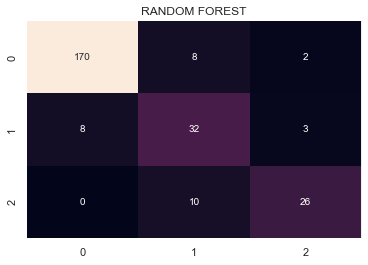

In [42]:
#Preview the heatmap of the Random Forest model's performance
plt.title("RANDOM FOREST")
sns.heatmap(rf_cnf_matrix, annot=True, cbar=False, fmt='d')

In [43]:
#Hierarchical, Clustering and PCA
AIBL=df.copy()

In [44]:
AIBL.head()

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
0,2,1,74,0,1,0,0,0,0,0,...,34.3,37.844,90.080,173.993,0.916,0.0,30,16,14,1
1,3,2,76,1,0,0,0,0,0,1,...,34.2,18.021,129.715,251.322,0.792,0.0,30,9,11,1
2,4,2,93,0,0,1,0,1,0,0,...,34.2,52.261,86.477,216.524,1.018,0.0,27,9,2,1
3,5,1,82,0,0,1,0,0,1,0,...,34.0,33.038,108.096,162.393,1.131,0.5,30,10,0,2
4,10,1,90,0,0,0,0,0,0,0,...,35.1,33.639,126.112,158.526,1.131,1.0,21,3,0,3


In [45]:
#info method prints information about the dataset
AIBL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RID        862 non-null    int64  
 1   PTGENDER   862 non-null    int64  
 2   Age        862 non-null    int64  
 3   MHPSYCH    862 non-null    int64  
 4   MH2NEURL   862 non-null    int64  
 5   MH4CARD    862 non-null    int64  
 6   MH6HEPAT   862 non-null    int64  
 7   MH8MUSCL   862 non-null    int64  
 8   MH9ENDO    862 non-null    int64  
 9   MH10GAST   862 non-null    int64  
 10  MH12RENA   862 non-null    int64  
 11  MH16SMOK   862 non-null    int64  
 12  MH17MALI   862 non-null    int64  
 13  APGEN1     862 non-null    int64  
 14  APGEN2     862 non-null    int64  
 15  AXT117     862 non-null    float64
 16  BAT126     862 non-null    float64
 17  HMT3       862 non-null    float64
 18  HMT7       862 non-null    float64
 19  HMT13      862 non-null    int64  
 20  HMT40     

In [46]:
# standardization of dataset to ensure all feature have equal weight
scaler = StandardScaler()
AIBL_std = scaler.fit_transform(AIBL)

In [47]:
#hierachical clustering with ward method and dendrogram
hierarchical_clust = linkage(AIBL_std, method = 'ward')

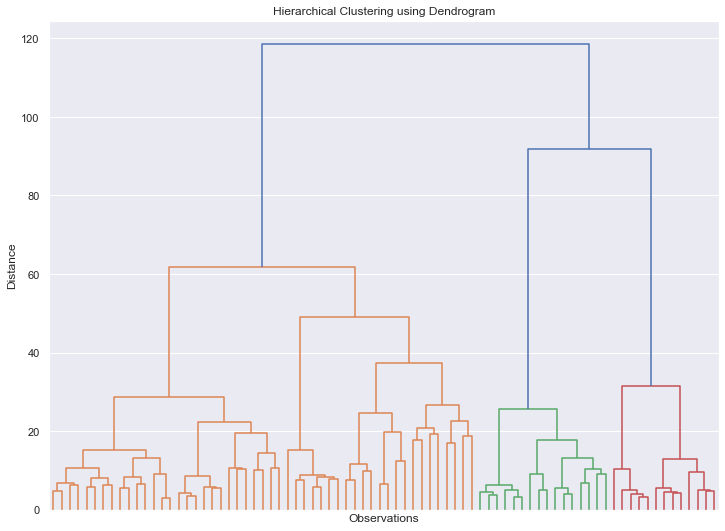

In [48]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering using Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hierarchical_clust,
           truncate_mode = 'level', 
           p = 6, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

In [49]:
#perform K- means with 9 clusters and iterations at a random state of 42
wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(AIBL_std)
    wcss.append(kmeans.inertia_)

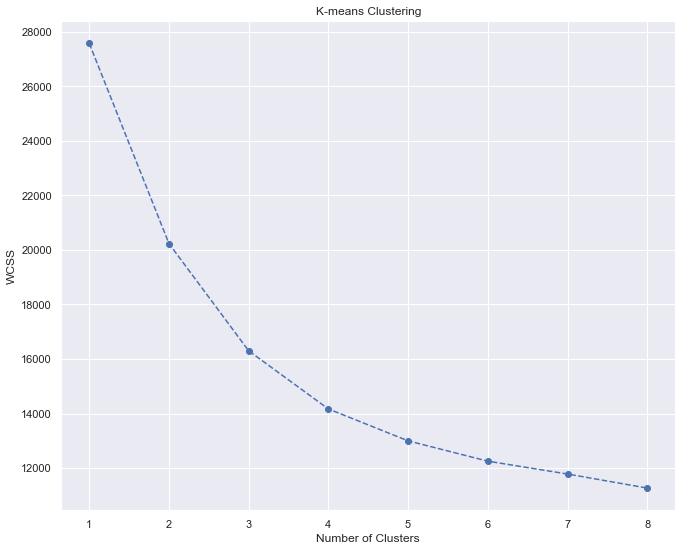

In [50]:
#plot of Within Cluster Sum of squares to determine the number of cluster for the analysis
plt.figure(figsize = (11,9))
plt.plot(range(1, 9), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [51]:
# k- means with 4 clusters 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 60)

In [52]:
kmeans.fit(AIBL_std)

KMeans(n_clusters=4, random_state=60)

In [53]:
#we created a copy of the original dataset  for clustering
AIBL_kmeans = AIBL.copy()
AIBL_kmeans['Segmentation K-means'] = kmeans.labels_

In [54]:
# determine mean value for cluster
AIBL_analysis = AIBL_kmeans.groupby(['Segmentation K-means']).mean()
AIBL_analysis

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
Segmentation K-means,,,,,,,,,,,,,,,,,,,,,
0,745.151261,1.561345,76.848739,0.178151,0.092437,0.410084,0.045378,0.521008,0.152941,0.228571,...,34.097479,36.996035,91.224906,205.957030,0.822405,0.035294,28.710924,12.616807,11.258824,1.043697
1,998.915000,1.515000,80.275000,0.295000,0.275000,0.425000,0.005000,0.420000,0.140000,0.280000,...,34.018500,36.226210,93.908400,204.788515,0.865500,0.700000,23.685000,4.500000,2.005000,2.475000
2,1065.673077,1.500000,77.442308,0.192308,0.153846,0.423077,0.038462,0.423077,0.269231,0.307692,...,-4.000000,-1.562827,1.462346,5.525250,-3.710500,0.278846,26.596154,10.019231,6.923077,1.557692
3,670.466667,1.466667,77.000000,-4.000000,-3.666667,-3.666667,-4.000000,-4.000000,-4.000000,-4.000000,...,21.546667,23.455467,64.485067,151.264533,-0.704333,0.666667,23.800000,7.533333,5.266667,2.133333


In [55]:
#determine the number of observations and Proportion of observation for each cluster
AIBL_analysis['N Observations'] = AIBL_kmeans[['Segmentation K-means','Age']].groupby(['Segmentation K-means']).count()
AIBL_analysis['Prop Observations'] = AIBL_analysis['N Observations'] / AIBL_analysis['N Observations'].sum()
AIBL_analysis=AIBL_analysis.rename({0:'HC',1:'HC',2:'Non-HC',3:'Non-HC'
                         })
AIBL_analysis

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis,N Observations,Prop Observations
Segmentation K-means,,,,,,,,,,,,,,,,,,,,,
HC,745.151261,1.561345,76.848739,0.178151,0.092437,0.410084,0.045378,0.521008,0.152941,0.228571,...,91.224906,205.957030,0.822405,0.035294,28.710924,12.616807,11.258824,1.043697,595,0.690255
HC,998.915000,1.515000,80.275000,0.295000,0.275000,0.425000,0.005000,0.420000,0.140000,0.280000,...,93.908400,204.788515,0.865500,0.700000,23.685000,4.500000,2.005000,2.475000,200,0.232019
Non-HC,1065.673077,1.500000,77.442308,0.192308,0.153846,0.423077,0.038462,0.423077,0.269231,0.307692,...,1.462346,5.525250,-3.710500,0.278846,26.596154,10.019231,6.923077,1.557692,52,0.060325
Non-HC,670.466667,1.466667,77.000000,-4.000000,-3.666667,-3.666667,-4.000000,-4.000000,-4.000000,-4.000000,...,64.485067,151.264533,-0.704333,0.666667,23.800000,7.533333,5.266667,2.133333,15,0.017401


In [56]:
# segment labels to the segmentation table
AIBL_kmeans['Labels'] = AIBL_kmeans['Segmentation K-means'].map({0:'HC',1:'HC',2:'Non-HC',3:'Non-HC'})

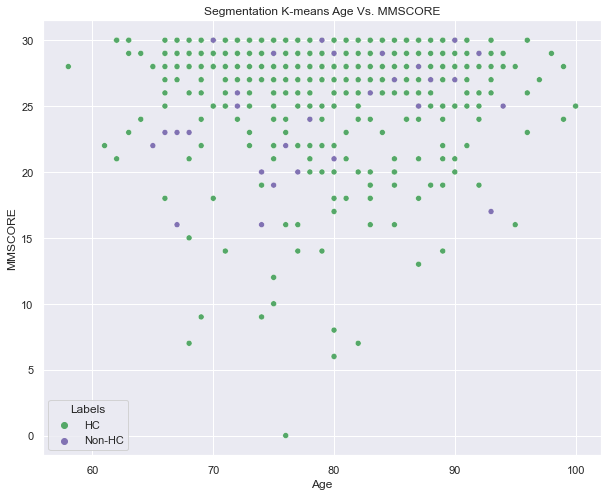

In [57]:
#AGE WITH COGNITIVE ASSESSEMENT USING K-MEANS
# Age and MMSCORE
x_axis = AIBL_kmeans['Age']
y_axis = AIBL_kmeans['MMSCORE']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_kmeans['Labels'], palette = ['g', 'm'])
plt.title('Segmentation K-means Age Vs. MMSCORE')
plt.show()



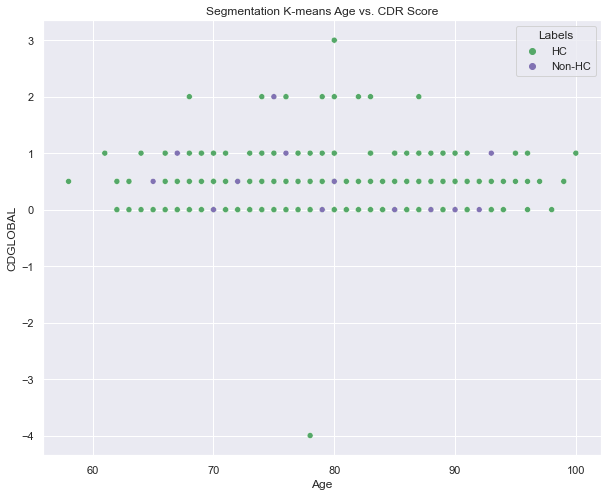

In [58]:
# Age and CDR Score
x_axis = AIBL_kmeans['Age']
y_axis = AIBL_kmeans['CDGLOBAL']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_kmeans['Labels'], palette = ['g', 'm'])
plt.title('Segmentation K-means Age vs. CDR Score')
plt.show()

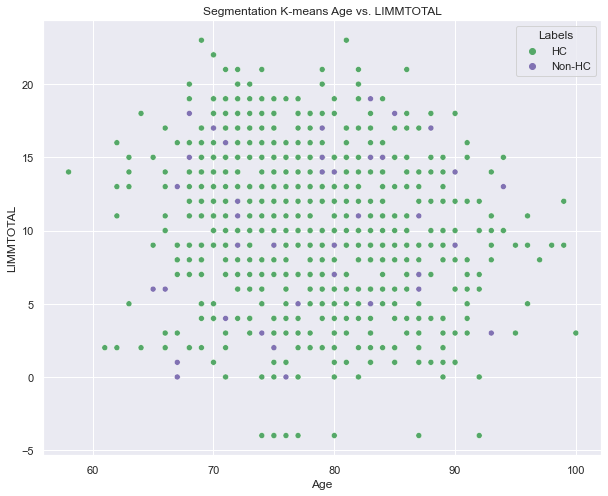

In [59]:
# Age and Logical Memory Recal Score
x_axis = AIBL_kmeans['Age']
y_axis = AIBL_kmeans['LIMMTOTAL']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_kmeans['Labels'], palette = ['g', 'm'])
plt.title('Segmentation K-means Age vs. LIMMTOTAL')
plt.show()

In [60]:
#Dimentionality Reduction Using PCA
#PCA for dimentionality reduction and to create components subset
pca = PCA()

In [61]:
# data standardization with pca
pca.fit(AIBL_std)

PCA()

In [62]:
#displays how each variables explains the variance
pca.explained_variance_ratio_

array([2.84118172e-01, 1.72029905e-01, 1.18512764e-01, 6.28053554e-02,
       4.18914969e-02, 3.86012462e-02, 3.02686296e-02, 2.42737558e-02,
       1.96313322e-02, 1.87102768e-02, 1.63610521e-02, 1.59897808e-02,
       1.53112615e-02, 1.40780774e-02, 1.35327706e-02, 1.30239754e-02,
       1.21970037e-02, 1.18179247e-02, 1.12157797e-02, 1.01100695e-02,
       9.54427099e-03, 9.09983996e-03, 7.92691584e-03, 7.33589494e-03,
       6.52337721e-03, 5.72292924e-03, 3.14010021e-03, 2.31559350e-03,
       1.97946135e-03, 1.49229698e-03, 4.08430675e-04, 3.02589338e-05])

In [63]:
# determine the number of components 
pca = PCA(n_components = 4)

In [64]:
#standadization of dataset
pca.fit(AIBL_std)

PCA(n_components=4)

In [65]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = AIBL.columns.values,
                           index = ['Component 1', 'Component 2','Component 3', 'Component 4'])
df_pca_comp

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,HMT102,RCT6,RCT11,RCT20,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis
Component 1,0.046356,-0.007018,-0.001379,-0.084603,-0.095335,-0.088310,-0.107684,-0.099674,-0.081237,-0.080819,...,-0.315217,-0.241483,-0.271225,-0.249755,-0.307488,0.053348,-0.050259,-0.041169,-0.058827,0.052929
Component 2,-0.039148,-0.020442,-0.010476,-0.280509,-0.322590,-0.289624,-0.355920,-0.311544,-0.315363,-0.306084,...,0.093283,0.068475,0.088066,0.095334,0.095966,0.075196,-0.065947,-0.048841,-0.039968,0.067731
Component 3,0.139930,-0.018740,0.112878,0.080232,0.116728,0.033528,0.027477,0.021666,0.017680,0.041740,...,0.021270,0.005674,0.022291,0.015237,0.022846,0.407549,-0.403738,-0.440477,-0.438655,0.418115
Component 4,0.308121,0.014237,-0.172305,0.000590,-0.022423,-0.025681,-0.009331,-0.017673,0.033685,-0.017973,...,0.024362,-0.007213,0.034827,0.032728,0.016967,-0.072280,-0.000816,-0.024183,-0.007197,-0.011380


In [66]:
#standardization of dataset for pca
pca.transform(AIBL_std)
scores_pca = pca.transform(AIBL_std)

In [67]:
# K clustering with PCA
wcss = []
for i in range(1,9):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 60)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

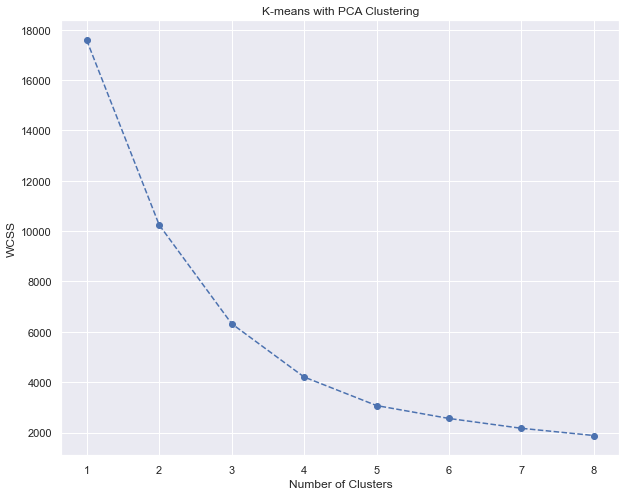

In [68]:
#plot of Within Cluster Sum of squares to determine the number of cluster for the analysis
plt.figure(figsize = (10,8))
plt.plot(range(1, 9), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [69]:
#k- means with 4 clusters and a random state of 60
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 60)

In [70]:
#standardization
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=60)

In [71]:
#𝐊-𝐦𝐞𝐚𝐧𝐬 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 𝐰𝐢𝐭𝐡 𝐏𝐂𝐀 𝐑𝐞𝐬𝐮𝐥𝐭𝐬
AIBL_pca_kmeans = pd.concat([AIBL.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
AIBL_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2','Component 3', 'Component 4']
AIBL_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [72]:
AIBL_pca_kmeans

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,2,1,74,0,1,0,0,0,0,0,...,0.0,30,16,14,1,-0.814756,0.093547,-1.980312,-0.631676,0
1,3,2,76,1,0,0,0,0,0,1,...,0.0,30,9,11,1,-0.956849,-0.133658,-0.752940,-0.773328,0
2,4,2,93,0,0,1,0,1,0,0,...,0.0,27,9,2,1,-1.344293,0.011660,0.590380,-0.721588,0
3,5,1,82,0,0,1,0,0,1,0,...,0.5,30,10,0,2,-0.587709,0.015797,1.020508,-0.562767,3
4,10,1,90,0,0,0,0,0,0,0,...,1.0,21,3,0,3,-0.934853,1.481073,3.831919,-1.672727,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1632,1,74,0,0,0,0,0,1,1,...,0.5,27,6,6,2,0.220614,-0.345980,1.462554,7.630192,3
858,1634,1,78,0,0,0,0,0,1,1,...,-4.0,20,5,4,1,-0.715906,-0.944147,-2.436777,8.368014,0
859,1636,1,67,0,0,1,0,0,1,0,...,0.5,28,3,3,2,-1.586337,0.354263,1.806592,7.941807,3
860,1637,1,68,0,0,0,0,1,0,0,...,0.5,28,8,12,2,-0.312447,0.258732,0.416449,7.630589,0


In [73]:
AIBL_pca_kmeans_freq = AIBL_pca_kmeans.groupby(['Segment K-means PCA']).mean()
AIBL_pca_kmeans_freq

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,RCT392,CDGLOBAL,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis,Component 1,Component 2,Component 3,Component 4
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,748.715243,1.561139,76.839196,0.175879,0.092127,0.410385,0.045226,0.524288,0.152429,0.227806,...,0.822377,0.038526,28.713568,12.619765,11.252931,1.050251,-0.908596,-0.156129,-0.890291,0.054727
1,1065.673077,1.500000,77.442308,0.192308,0.153846,0.423077,0.038462,0.423077,0.269231,0.307692,...,-3.710500,0.278846,26.596154,10.019231,6.923077,1.557692,10.291314,-3.429217,-0.323089,-0.286643
2,670.466667,1.466667,77.000000,-4.000000,-3.666667,-3.666667,-4.000000,-4.000000,-4.000000,-4.000000,...,-0.704333,0.666667,23.800000,7.533333,5.266667,2.133333,7.902601,15.565426,-1.055047,0.089060
3,990.732323,1.515152,80.338384,0.303030,0.277778,0.424242,0.005051,0.409091,0.141414,0.282828,...,0.866020,0.696970,23.626263,4.409091,1.929293,2.469697,-0.561896,0.192156,2.849142,-0.096478


In [74]:
# Calculate the number of observations in the cluster and its proportion.
AIBL_pca_kmeans_freq['N obervations'] = AIBL_pca_kmeans[['Segment K-means PCA','Age']].groupby(['Segment K-means PCA']).count()
AIBL_pca_kmeans_freq['Prop obervations'] = AIBL_pca_kmeans_freq['N obervations'] / AIBL_pca_kmeans_freq['N obervations'].sum()
AIBL_pca_kmeans_freq = AIBL_pca_kmeans_freq.rename({0:'HC',1:'HC',2:'Non-HC',3:'Non-HC'})
AIBL_pca_kmeans_freq

,RID,PTGENDER,Age,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,MH10GAST,...,MMSCORE,LIMMTOTAL,LDELTOTAL,Diagnosis,Component 1,Component 2,Component 3,Component 4,N obervations,Prop obervations
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
HC,748.715243,1.561139,76.839196,0.175879,0.092127,0.410385,0.045226,0.524288,0.152429,0.227806,...,28.713568,12.619765,11.252931,1.050251,-0.908596,-0.156129,-0.890291,0.054727,597,0.692575
HC,1065.673077,1.500000,77.442308,0.192308,0.153846,0.423077,0.038462,0.423077,0.269231,0.307692,...,26.596154,10.019231,6.923077,1.557692,10.291314,-3.429217,-0.323089,-0.286643,52,0.060325
Non-HC,670.466667,1.466667,77.000000,-4.000000,-3.666667,-3.666667,-4.000000,-4.000000,-4.000000,-4.000000,...,23.800000,7.533333,5.266667,2.133333,7.902601,15.565426,-1.055047,0.089060,15,0.017401
Non-HC,990.732323,1.515152,80.338384,0.303030,0.277778,0.424242,0.005051,0.409091,0.141414,0.282828,...,23.626263,4.409091,1.929293,2.469697,-0.561896,0.192156,2.849142,-0.096478,198,0.229698


In [75]:
#naming the segmentation of Kmeans PCA,HC and Non- HC (combining MCI and AD)
AIBL_pca_kmeans['Legend'] = AIBL_pca_kmeans['Segment K-means PCA'].map({0:'HC',1:'HC',2:'Non-HC',3:'Non-HC'})

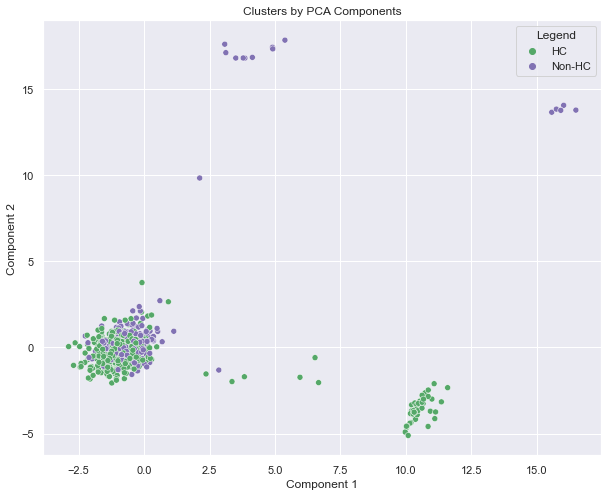

In [76]:
# Plot data by PCA components
x_axis = AIBL_pca_kmeans['Component 1']
y_axis = AIBL_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_pca_kmeans['Legend'], palette = ['g',  'm'])
plt.title('Clusters by PCA Components')
plt.show()

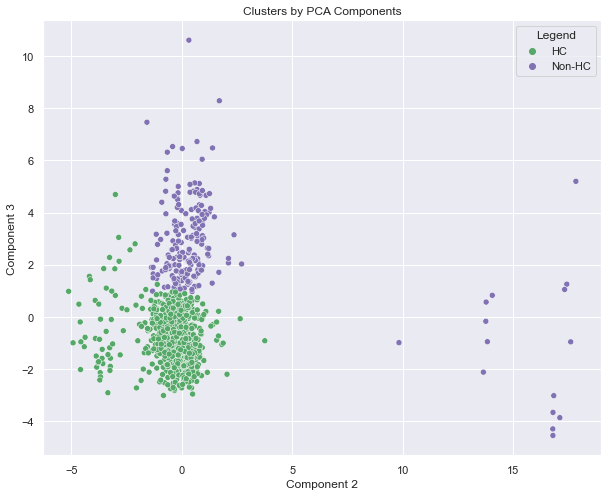

In [77]:
# Plot data by PCA components
x_axis = AIBL_pca_kmeans['Component 2']
y_axis = AIBL_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_pca_kmeans['Legend'], palette = ['g',  'm'])
plt.title('Clusters by PCA Components')
plt.show()

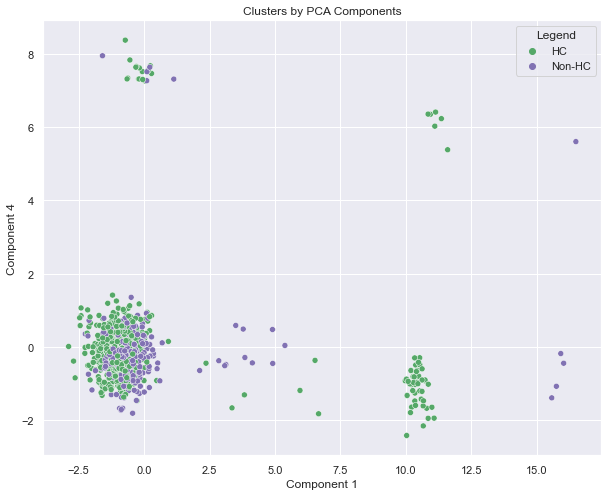

In [78]:
# Plot data by PCA components
x_axis = AIBL_pca_kmeans['Component 1']
y_axis = AIBL_pca_kmeans['Component 4']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_pca_kmeans['Legend'], palette = ['g',  'm'])
plt.title('Clusters by PCA Components')
plt.show()

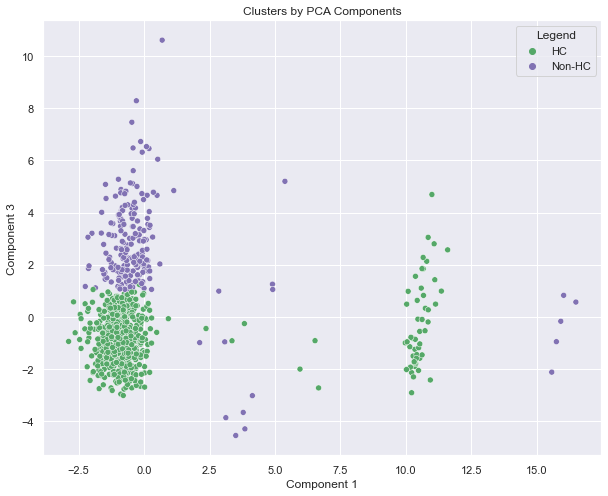

In [79]:
# Plot data by PCA components
x_axis = AIBL_pca_kmeans['Component 1']
y_axis = AIBL_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_pca_kmeans['Legend'], palette = ['g',  'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [80]:
#AIBL dataset with Logistic Regression
X = df1.drop(['Diagnosis'], axis=1)
y = df1['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [82]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7722007722007722



Classification report
              precision    recall  f1-score   support

           1       0.86      0.91      0.89       180
           2       0.37      0.35      0.36        43
           3       0.75      0.58      0.66        36

    accuracy                           0.77       259
   macro avg       0.66      0.61      0.63       259
weighted avg       0.76      0.77      0.77       259



<AxesSubplot:title={'center':'Logical Regression'}>

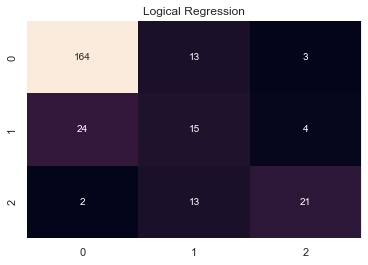

In [83]:
print()
print("Classification report")
lr_cnf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
plt.title("Logical Regression")
sns.heatmap(lr_cnf_matrix, annot=True, cbar=False, fmt='g')

In [101]:
#AIBL dataset with Suport Vector Machine
X = df1.drop('Diagnosis', axis=1)
y = df1['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
#Scale the data: SVM is sensitive to the scale of the features. Therefore, it is important to scale the data before training the model. We can use the StandardScaler from the Scikit-learn library to do this:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
#Train the model using SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [104]:
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8648648648648649


In [105]:
print("Classification report")
svm_cnf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           1       0.95      0.92      0.94       180
           2       0.64      0.74      0.69        43
           3       0.76      0.72      0.74        36

    accuracy                           0.86       259
   macro avg       0.78      0.80      0.79       259
weighted avg       0.87      0.86      0.87       259



In [106]:
accuracy = accuracy_score(y_test,y_pred)
print(f"The accuracy of the {type(model).__name__} is {round(accuracy_score(y_test, y_pred) * 100)}%\n\n")

The accuracy of the SVC is 86%




<AxesSubplot:title={'center':'Support Vector Machine'}>

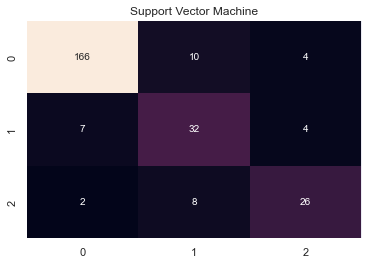

In [107]:
#Plotting it in seaborn heatmap
svm_cnf_matrix = confusion_matrix(y_test, y_pred)
plt.title("Support Vector Machine")
sns.heatmap(svm_cnf_matrix, annot=True, cbar=False, fmt='g')